# <font face="Verdana" size=6 color='#6495ED'> IAD-004 AULA 01: REGRESSÃO
<font face="Verdana" size=3 color='#40E0D0'> Professores Larissa Driemeier e Thiago Martins

<center><img src='https://drive.google.com/uc?export=view&id=1J3dF7v9apzpj27oOsrT8aEagtNIYwq7J' width="600"></center>

Este notebook introdutório é sobre problemas de Regressão, baseado na primeira aula [IAD-004](https://alunoweb.net/moodle/pluginfile.php/141625/mod_resource/content/2/ML1_A01_Y2024.pdf), ano 2024.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A regressão linear consiste em tentar explicar o comportamento de uma variável, dita *dependente*, a partir de uma ou mais variáveis, ditas *independentes*, com um modelo linear.

Seja $\mathbf y = \left\{y^{(1)}, y^{(2)}, \ldots, y^{(m)}\right\}$ uma amostra do conjunto de variáveis dependentes e $\mathbf X = \left\{\mathbf x^{(1)}, \mathbf x^{(2)}, \ldots, \mathbf x^{(m)}\right\}$ as correspondentes variáveis independentes da amostra.

O modelo linear para o comportamento destas variáveis é dado pela equação:
\begin{equation}
 y^{(i)} =  w_0 +  w_1 x_1^{(i)} + w_2 x_2^{(i)}+\cdots + w_n x_n^{(i)} + \epsilon^{(i)}
\end{equation}
onde $ w_0, \cdots, w_n$ são *parâmetros* do modelo e $\epsilon^{(i)$ é o erro.

Na forma matricial tem-se,
\begin{equation}
\mathbf y = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_m\end{bmatrix}
\end{equation}
um vetor de dimensão $m$, onde $m$ é o número de amostras do conjunto de dados, e
\begin{equation}
\mathbf X = \begin{bmatrix}x_{1,1} & x_{1,2} & \ldots & x_{1,n} & 1\\
x_{2,1} & x_{2,2} & \ldots & x_{2,n} & 1\\
 \vdots & \vdots & \ddots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & \ldots & x_{m,n} & 1\end{bmatrix}=\begin{bmatrix}\mathbf x^{(1)}\\
\mathbf x^{(2)}\\
 \vdots \\
\mathbf x^{(m)}\end{bmatrix}
\end{equation}
uma matriz $m \times (n+1)$ cujas primeiras $n$ colunas são compostas por uma amostra de cada uma das $n$ variáveis independetes e a sua *última* coluna é composta da constante 1.
Define-se também,
\begin{equation}
\mathbf w = \begin{bmatrix}w_0\\
w_1\\
w_2\\
\vdots\\
w_n
\end{bmatrix}
\end{equation}
é o vetor de $(n+1)$ componentes dos coeficientes de cada uma das variáveis independentes. Note que nesta notação o coeficiente $w_0$ é o *primeiro* coeficiente (há notações distintas nas quais ele é o último).

O modelo linear para o comportamento destas variáveis é dado pela equação:
\begin{equation}
\mathbf y =  \mathbf X \mathbf w + \mathbf e
\end{equation}
onde o erro randômico $\mathbf e$ do conjunto de dados é a diferença entre os valores observados e os valores verdadeiros, não observáveis.

 ![](https://drive.google.com/uc?export=view&id=1mRM2uGuHlB46FuiRz6iaeV9O71P9IbIv)

Importante comentar que o erro randômico não é observável, pois sua definição depende do conhecimento de $ \mathbf X \mathbf w$. Como não conhecemos o erro, fazemos apenas suposições a seu respeito.

No problema de regressão, estimamos os parâmetros reais $\mathbf w$, de forma que :
\begin{equation}
\hat{\mathbf y} =  \mathbf X \hat{\mathbf w} +  \newcommand{\beps}{\boldsymbol \epsilon} \beps
\end{equation}
onde $\hat{\mathbf y}$ é uma aproximação das observações $\mathbf y$. Define-se ainda o resíduo $\epsilon^{(i)}$ como a diferença entre o valor observado $ y^{(i)}$ e estimado $\hat y^{(i)}$,
\begin{equation}
\epsilon^{(i)} = y^{(i)}-\hat y^{(i)} = y^{(i)}-\left( \hat w_0 + \hat w_1 x_1^{(i)} + w_2 x_2^{(i)}+\cdots +\hat w_n x_n^{(i)} \right)
\end{equation}
de forma que $\beps$ é o vetor de *resíduos* de dimensão $n+1$. Os resíduos podem ser considerados somente estimativas dos erros. No entanto, só temos acesso aos resíduos, então é com isso que trabalhamos.

Daqui para frente, por brevidade, e cientes de que sempre estamos buscando um conjunto de parâmetros que  aproxime a função real, $\hat w_i = w_i$.




## As suposições de Gauss-Markov

Ao usar estimadores não viesados para os modelos de regressão, ié, $𝐸\left(\epsilon^{(𝑖)}\right)=0$, garantimos que pelo menos em média, estimamos o parâmetro verdadeiro.

Ao comparar diferentes estimadores não viesados, é, ainda, interessante saber qual deles tem a maior precisão possível.

O teorema de Gauss Markov nos diz que se um certo conjunto de suposições for atendido, a estimativa de mínimos quadrados ordinários para coeficientes de regressão fornece a mais baixa variância de amostragem dentro da classe dos estimadores lineares não enviesados (BLUE, do inglês Best Linear Unbiased Estimate) possível.

1. **Linearidade:** $\newcommand{\my}{\mathbf y}\my=\newcommand{mX}{\mathbf{Xw}}\mX \newcommand{\mw}{\mathbf w} + \beps$, os parâmetros que estimamos usando o método OLS devem ser lineares.
2. **Aleatoriedade:** nossos dados devem ter sido amostrados aleatoriamente na população, por um mecanismo não relacionado a $\beps$.
5. **Exogeneidade:** como dito no item anterior, os regressores $x^{(i)}$ não são correlacionados com o termo de resíduo $cov\left(x^{(i)},\epsilon^{(i)}\right)=0, i\ne j$.
3. **Resíduos com média nula:** Essa suposição afirma que a *média dos resíduos* é $0$ para qualquer valor de $\mX$, ié, $𝐸(\epsilon^{(i)}|\mX)=0$. Colocado de outra forma, nenhuma observação das variáveis independentes fornece qualquer informação sobre o valor esperado do resíduo. A suposição implica que $E(\my) = \mX$. Isso é importante, pois essencialmente diz que acertamos a função média.
4. **Resíduos com covariância nula:** Cada termo de resíduo é independentemente distribuído e não correlacionado $cov\left(\epsilon^{(𝑖)},\epsilon^{(𝑗)}|\mX\right)=0, i\ne j$. A suposição de nenhuma autocorrelação quer dizer que: saber algo sobre o resíduo para uma observação não nos diz nada sobre o resíduo para qualquer outra observação.
6. **Homocedasticidade:** a variância de $\epsilon^{(i)}$ é constante para qualquer $i$, ié, $var\left(\epsilon^{(𝑖)}|\mX\right)=\sigma_{\epsilon}^2,\forall i$.

Ainda, para garantirmos a máxima verossimilhança, assume-se que o resíduo tem distribuição normal com média nula e variância $\sigma_{\epsilon}^2$,
$$
\beps \approx N\left[ 0,\sigma_{\epsilon}^2 \mathbf I \right]
$$



Mais matemática sobre o Teorema de Gauss Markov pode ser encontrada no [link](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf).



## 1. Regressão Linear Simples

A regressão linear simples trata de apenas uma variável independente.

Seja $\mathbf y = \left\{y^{(1)}, y^{(2)}, \ldots, y^{(m)}\right\}$ uma amostra do conjunto de variáveis independentes e $\mathbf x = \left\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\right\}$

O modelo linear simples para o comportamento destas variáveis é dado pela equação:

\begin{equation}
\hat y^{(i)} = w_0 + w_1 x^{(i)} + \epsilon^{(i)}
\end{equation}

A hipótese do modelo linear é a de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*,
$$
\epsilon^{(i)} \approx N\left[ 0,\sigma_{\epsilon}^2 \right]
$$

Isso significa essencialmente que nossos dados têm uma relação linear que é corrompida pelo ruído gaussiano aleatório que tem média zero e variação constante.

Isso tem a implicação de que $y^{(i)}$  é uma variável aleatória gaussiana e podemos calcular sua expectativa e variação:
$$
E[y^{(i)}] = E[\mathbf x^{(i)T} \mathbf w + \epsilon^{(i)}] = \mathbf x^{(i)T} \mathbf w
$$

$$
Var[y^{(i)}] = Var[\mathbf x^{(i)T} \mathbf w + \epsilon^{(i)}] = \sigma^2
$$
onde $\mathbf x^{(i)}=\left[x^{(i)} \quad 1\right]^T$ e $\mathbf w=\left[w_1 \quad w_0\right]^T$.

Isso equivale a supor que as variáveis independentes são resultado da reta $y = w_0 + w_1 x $ sobreposta a um ruído Gaussiano.

Adicionando-se a hipótese de que os ruídos Gaussianos são todos com a mesma covariância, os parâmetros da reta de *máxima verissimilhança* são dados pela minimização da função custo dada pelo somatório quadrático dos resíduos, ié:

\begin{equation}
\underset{w_0, w_1}{\mbox{arg min}} \sum_i \left[\epsilon^{(i)}\right]^2= \sum_i \left(y^{(i)} - w_0 - w_1 x^{(i)}\right)^2
\end{equation}

Então:
\begin{align}
\frac{\partial EQT}{\partial w_0} &= 2  \sum_i \left(y^{(i)} - w_0 - w_1 x^{(i)}\right)(-1)=0\\
\frac{\partial EQT}{\partial w_1} &= 2  \sum_i \left(y^{(i)} - w_0 - w_1 x^{(i)}\right)(-x^{(i)})=0
\end{align}

Portanto, após longa, e trivial, manipulação algébrica,
\begin{align}
w_1 &= \frac{s_{xy}}{s_{xx}}\\
w_0 &= \bar{y} - w_1 \bar{x}
\end{align}
definindo-se,
\begin{align}
\bar{x} &= \frac{1}{n}\sum_i x^{(i)} \\
\bar{y} &= \frac{1}{n}\sum_i y^{(i)} \\
s_{xx} &= \sum_i (x^{(i)} - \bar{x})^2 \\
s_{yy} &= \sum_i (y^{(i)} - \bar{y})^2 \\
s_{xy} &= \sum_i (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})
\end{align}

E finalmente, a soma total dos quadrados dos resíduos é dada por:

\begin{equation}
R^2 = \sum_i \left[\epsilon^{(i)}\right]^2=s_{yy}\left(1-\frac{s_{xy}^2}{s_{xx} s_{yy}}\right)
\end{equation}

O valor

\begin{equation}
r = \frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

é chamado de *coeficiente de correlação de Pearson*. Este é um valor que varia de $-1$ a $1$ e mede o quão bem a variável dependente pode ser explicada por um modelo linear da variável dependente.

Valores mais próximos de zero significam um modelo linear menos explicativo.

Valores mais próximos de $1$ ou $-1$ significam um modelo linear mais explicativo.



### Exemplo 01

Dados de idade e pressão,
```
idade = x = [52,59,67,73,64,74,54,61,65,46,72]
pressao = y = [132,143,153,162,154,168,137,149,159,128,166]
```

Determine:
1. Os valores de $\bar{x}$, $\bar{y}$;
2. Os valores de $s_{xx}, s_{yy}, s_{xy}$;
3. Os valores de  $w_0$ e $w_1$ no modelo $\hat y^{(i)} = w_0 + w_1 x^{(i)} + \epsilon^{(i)}$ de máxima verissimilhança;
4. Repita a plotagem *scatter* do enunciado sobreposta à reta $\hat y=w_0 + w_1 x$;
5. Calcule o resíduo quadrático total $\sum_i \left[\epsilon^{(i)}\right]^2$;
6. Calcule o coeficiente de correlação de Pearson e compare o valor $s_{yy}(1-r^2)$ com o obtido no item anterior.

In [2]:
idade =     [ 52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72]
pressao =   [132,143,153,162,154,168,137,149,159,128,166]

In [3]:
x_bar = np.mean(idade)
y_bar = np.mean(pressao)
print('A média de x é: {:6.2f}'.format(x_bar))
print('A média de y é: {:6.2f}'.format(y_bar))


A média de x é:  62.45
A média de y é: 150.09


In [4]:
dx = (idade - x_bar)
dy = (pressao - y_bar)
sxx = np.sum(dx**2)
syy = np.sum(dy**2)
sxy = np.sum(dx*dy)
print('sxx: '+str(sxx))
print('syy: '+str(syy))
print('sxy: '+str(sxy))

sxx: 830.7272727272727
syy: 1856.909090909091
sxy: 1215.5454545454545


In [5]:
w1_teo=sxy/sxx
w0_teo= y_bar-x_bar*w1_teo
print('w0: '+str(w0_teo),'w1: '+str(w1_teo))

w0: 58.70551543007224 w1: 1.4632304661851607


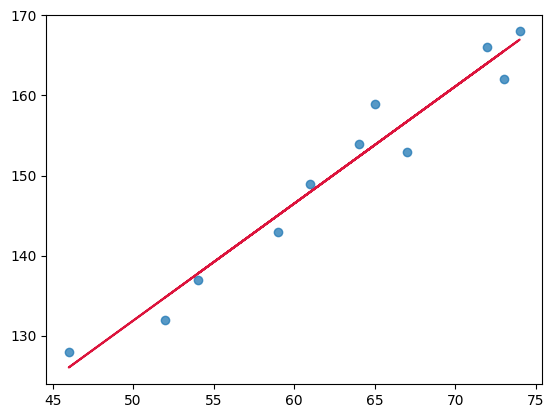

In [6]:
plt.scatter(x=idade, y=pressao,alpha=0.75)
plt.plot(idade,w0_teo+np.asarray(idade)*w1_teo,color='crimson')
plt.show()

In [8]:
w=[]
w0,w1= 0.0,0.5
w.append([w0,w1])

alpha = 0.0005
eps = 1e-4
max_iter = 500000

m = len(idade)
grad_w0 = 0.0
grad_w1 = 0.0
for i,j in zip(idade,pressao):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
grad = [grad_w0,grad_w1]

count = 0
while np.linalg.norm(grad)>eps and count<max_iter:
  grad_w0 = 0.0
  grad_w1 = 0.0
  for i,j in zip(idade,pressao):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
  w0 = w0-alpha*grad_w0
  w1 = w1-alpha*grad_w1
  w.append([w0,w1])
  grad = [grad_w0,grad_w1]
  count += 1

print('w0: '+str(w0))
print('w1: '+str(w1))

w0: 58.19648423796317
w1: 1.4712261243031135


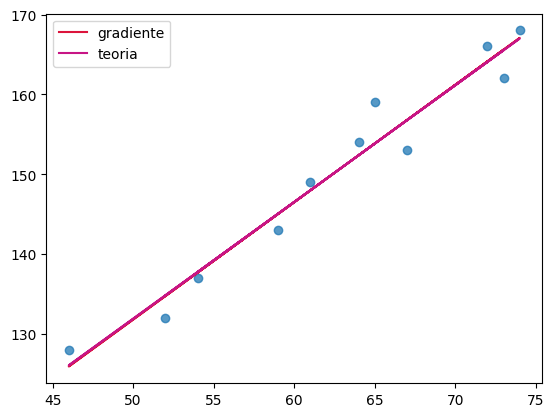

In [9]:
plt.scatter(x=idade, y=pressao,alpha=0.75)

plt.plot(idade,w0+np.asarray(idade)*w1,color='crimson', label = "gradiente")
plt.plot(idade,w0_teo+np.asarray(idade)*w1_teo,color='mediumvioletred', label = "teoria")
plt.legend()
plt.show()

In [10]:
eps = syy*(1.0-sxy**2/(sxx*syy))
print('eps: {:2.4f}'.format(eps))
r= sxy/(np.sqrt(sxx*syy))
print('r: {:2.4f}  syy(1-r2):  {:6.4f}  '.format(r,(syy*(1-r**2))))

eps: 78.2859
r: 0.9787  syy(1-r2):  78.2859  


Definição de $R^2$

$𝑅^2$  (R-quadrado) é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Também é conhecido como coeficiente de determinação.

Pode-se calcular a partir de sua definição:
$$
\begin{align} R^2&=1-\frac{\text{SSR}}{\text{SST}},\\ &=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2} = \frac{s_{xy}^2}{s_{xx}s_{yy}} \end{align}
$$
 onde SSR (sum squared regression) é a soma do quadrado dos erros da regressão, enquanto SST (total sum of squares)  é a soma do quadrado dos erros, quando a regressão coincide com a linha média ${\bar y}$

In [11]:
from sklearn.metrics import r2_score

coef = r2_score(np.array(pressao), w0+w1*np.array(idade))
print(coef)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
SSE = (np.array(pressao)-w0-w1*np.array(idade))**2
SSy = np.sum((np.array(pressao)-np.mean(pressao))**2)
print(1-np.sum(SSE)/SSy)

In [ ]:
(sxy*sxy/(sxx*syy))

### Exercício 02

Os dados abaixo referem-se aos anos de experiência e salário de funcionários de uma empresa.

Determine a curva de regressão e analise a correlação entre a curva teórica e os dados disponibilizados.

In [ ]:
data = np.array([
[1.1,39343.00],
[1.3,46205.00],
[1.5,37731.00],
[2.0,43525.00],
[2.2,39891.00],
[2.9,56642.00],
[3.0,60150.00],
[3.2,54445.00],
[3.2,64445.00],
[3.7,57189.00],
[3.9,63218.00],
[4.0,55794.00],
[4.0,56957.00],
[4.1,57081.00],
[4.5,61111.00],
[4.9,67938.00],
[5.1,66029.00],
[5.3,83088.00],
[5.9,81363.00],
[6.0,93940.00],
[6.8,91738.00],
[7.1,98273.00],
[7.9,101302.00],
[8.2,113812.00],
[8.7,109431.00],
[9.0,105582.00],
[9.5,116969.00],
[9.6,112635.00],
[10.3,122391.00],[10.5,121872.00]])

In [ ]:
w=[]
w0,w1= 0.0,0.5
w.append([w0,w1])

alpha = 0.0005
eps = 1e-4
max_iter = 500000


m = len(idade)
grad_w0 = 0.0
grad_w1 = 0.0
for i,j in zip(idade,pressao):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
grad = [grad_w0,grad_w1]

x=data[:,0]
y=data[:,1]
print(x,y)

count = 0
while np.linalg.norm(grad)>eps and count<max_iter:
  grad_w0 = 0.0
  grad_w1 = 0.0
  for i,j in zip(x,y):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
  w0 = w0-alpha*grad_w0
  w1 = w1-alpha*grad_w1
  w.append([w0,w1])
  grad = [grad_w0,grad_w1]
  count += 1

print('w0: '+str(w0))
print('w1: '+str(w1))

In [ ]:
plt.scatter(x=data[:,0], y=data[:,1],alpha=0.75, label = "Dados")
media = [np.mean(data[:,1])]*len(data)
plt.plot(data[:,0], media, color='crimson', label = "Média")
plt.plot(data[:,0],w0+np.asarray(data[:,0])*w1,color='forestgreen', label = "Regressão")
plt.legend()
plt.show()

In [ ]:
data_regr = w0+np.asarray(data[:,0])*w1

x_bar = np.mean(data[:,0])
y_bar = np.mean(data[:,1])

dx = (data[:,0] - x_bar)
dy = (data[:,1] - y_bar)
dy_regr = (data[:,1] - data_regr)


sxx = np.sum(dx**2)
syy = np.sum(dy**2)
sxy = np.sum(dx*dy)
s_regr = np.sum(dy_regr**2)
r2= (sxy/(np.sqrt(sxx*syy)))**2
r2_regr = (syy - s_regr) / syy


print('R2 é: {:6.2f}'.format(r2))
print('R2 é: {:6.2f}'.format(r2_regr))

## 2. Regressão multilinear

A regressão multi-linear trata da relação de uma variável dependente com *múltiplas* variáveis independentes.

\begin{equation}
y^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_n x_n^{(i)} +w_0+\epsilon^{(i)}
\end{equation}

A função perda ou custo é definida pelo somatório da função erro de cada amostra,
$$
J(\mathbf{X,w})=\frac{1}{m} \sum_{i=1}^n \textbf{L}\left(y^{(i)}, h_\mathbf w(\mathbf x^{(i)})\right)
$$

Utilizando-se a função erro quadrática tem-se que,
$$
\textbf{L}\left(y^{(i)}, h_\mathbf w(\mathbf x^{(i)})\right) = \| \mathbf{y} - \mathbf{X w} \|^2_2
$$

Seguindo a mesma hipótese de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*, o vetor $\mathbf w$ de *máxima verossimilhança* é dado pela minimização da função custo, ié,:
\begin{equation}
\underset{\mathbf w}{\mbox{arg min}} \parallel \mathbf \beps \parallel^2= \parallel \mathbf{y} - \mathbf{X w} \parallel^2_2
\end{equation}

Suponha que estamos interessados em minimizar, para $\newcommand{\bhat}{{\mathbf w}}\bhat \in \newcommand{\reals}{\mathbb{R}} \reals^n$ qualquer,
$$
\newcommand{\err}{\mathcal{E}}
\err = \| \beps \|^2 = (\newcommand{\my}{\mathbf y}\my - \newcommand{\mX}{\mathbf X}\mX \bhat)^T (\my - \mX \bhat),
$$
onde $\mw \in \reals^n$ são os coeficientes da regressão. Assume-se, por simplicidade, que $n \leq m$ e $\mathrm{rank}(\mX) = n$.
\begin{align}
\err &= \my^T\my-\bhat^T\mX^T\my-\my^T\mX\bhat+\bhat^T\mX^T\mX\bhat\\
&=\my^T\my-2\bhat^T\mX^T\my+\bhat^T\mX^T\mX\bhat \tag{1}
\end{align}
onde este desenvolvimento usa o fato de que a transposição de um escalar é o escalar, ou seja $\bhat^T\mX^T\my=\my^T\mX\bhat$.

Para encontrar o $\bhat$ que minimiza a soma dos resíduos quadrados, precisamos tirar a derivada de (1) em relação a $\bhat$. Isso nos dá a seguinte equação:
\begin{equation}
\frac{\partial\err}{\partial \bhat} = -2\mX^T\my+ 2 \mX^T\mX\bhat = 0
\end{equation}

Da equação acima obtemos o que chamamos de *equações normais*,
\begin{equation}
\mX^T\mX\bhat = \mX^T\my \tag{2}
\end{equation}
onde, obviamente, $\mX^T\mX$ é sempre quadrada simétrica.

Lembre-se de que $\mX^T\mX$ e $\mX^T\my$ são conhecidos de nossos dados, mas $\bhat$ é desconhecido. Se o inverso de $\mX^T\mX$ existe
(ou seja, $\left(\mX^T\mX\right)^{-1}$, então a pré-multiplicação de ambos os lados por esse inverso nos dá a seguinte equação:
\begin{align}
\left(\mX^T\mX\right)^{-1}\left(\mX^T\mX\right)\bhat &= \left(\mX^T\mX\right)^{-1}\mX^T\my \\
\bhat &= \left(\mX^T\mX\right)^{-1}\mX^T\my
\end{align}

Portanto, $\err$ é minimizado quando $\bhat = (\mX^T \mX)^{-1} \mX^T \my$ e a matriz $\left(\mX^T \mX\right)^{-1}\mX^T$ é dita a *pseudo-inversa* de $\mX$.

**Nota**: Em geral não é eficiente calcular explicitamente esta matriz.

Porém, lembre-se que definimos um resíduo, ié, um erro da previsão em relação à resposta exata $\beps$,
$$
\my=\mX\bhat+ \beps
$$

Substituindo-se em (2),
\begin{align}
\left(\mX^T\mX\right)\bhat &= \mX^T\left(\mX\bhat+ \beps\right)\\
\left(\mX^T\mX\right)\bhat &= \mX^T\mX\bhat+ \mX^T\beps \\
\therefore \mX^T\beps = 0
\end{align}

### Exemplo 03

Dadas as características ($x_1$ e $x_2$) e variável dependente ($y$),
```
x1 = np.array([4,2,1,3,1,6])
x2 = np.array([1,8,0,2,4,7])
y = np.array([2,-14,1,-1,-7,-8])
```
utilize a resposta analítica,
$$
\newcommand{\mw}{\mathbf w}\mw = (\newcommand{\mX}{\mathbf X} \mX^T \mX)^{-1} \mX^T \newcommand{\my}{\mathbf y} \my
$$
para encontrar os pesos da regressão linear.

In [ ]:
x1 = np.array([4,2,1,3,1,6])
x2 = np.array([1,8,0,2,4,7])
y = np.array([2,-14,1,-1,-7,-8])

In [ ]:
MX = np.array([np.ones(len(x1)),x1,x2]).T
W = np.linalg.solve(MX.T.dot(MX),MX.T.dot(y))
print('w0 = '+str(W[0]) + '  w1 = '+str(W[1]) + '  w2 = '+str(W[2]))

__Agora, monte um procedimento iterativo para encontrar os pesos da regressão.__

In [ ]:
## Sua resposta##

Agora veja o exemplo abaixo...

A relação entre semanas de trabalho e carros vendidos da *Locadora Jack*.

In [ ]:
SemanasTrabalho = np.array([168.,428.,296.,392.,80.,56.,352.,444.,168.,200.,4.,52.,20.,228.,72.])
CarrosVendidos =  np.array([272.,300.,311.,365.,167.,149.,366.,310.,192.,229.,88.,118.,62.,319.,193.])
data = []
for i,j in zip(SemanasTrabalho,CarrosVendidos):
  data.append([i,j])
data = np.array(data)

In [ ]:
w=[]
w0,w1= 0.,100.
w.append([w0,w1])

alpha = 0.000025
eps = 1e-4
max_iter = 500000

x=data[:,0]
y=data[:,1]

m = len(x)
grad_w0 = 0.0
grad_w1 = 0.0
for i,j in zip(x,y):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
grad = [grad_w0,grad_w1]

count = 0
while np.linalg.norm(grad)>eps and count<max_iter:
  grad_w0 = 0.0
  grad_w1 = 0.0
  for i,j in zip(x,y):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
  w0 = w0-alpha*grad_w0
  w1 = w1-alpha*grad_w1
  w.append([w0,w1])
  grad = [grad_w0,grad_w1]
  count += 1

print('w0: '+str(w0))
print('w1: '+str(w1))

In [ ]:
plt.scatter(x=SemanasTrabalho, y=CarrosVendidos,alpha=0.75, label = "Dados")
media = [np.mean(data[:,1])]*len(data)
#
plt.plot(data[:,0],w0+np.asarray(data[:,0])*w1,color='forestgreen', label = "Regressão")
plt.legend()
plt.show()

In [ ]:
data_regr = w0+np.asarray(data[:,0])*w1

x_bar = np.mean(data[:,0])
y_bar = np.mean(data[:,1])

dx = (data[:,0] - x_bar)
dy = (data[:,1] - y_bar)
dy_regr = (data[:,1] - data_regr)


sxx = np.sum(dx**2)
syy = np.sum(dy**2)
sxy = np.sum(dx*dy)
s_regr = np.sum(dy_regr**2)
r2= (sxy/(np.sqrt(sxx*syy)))**2
r2_regr = (syy - s_regr) / syy


print('R2 é: {:6.2f}'.format(r2))
print('R2 é: {:6.2f}'.format(r2_regr))

In [ ]:
plt.scatter(x=SemanasTrabalho, y=dy_regr,alpha=0.75)
media = [np.mean(data[:,1])]*len(data)
plt.xlabel("Semanas de Trabalho")
plt.ylabel("Resíduo")
plt.show()

In [ ]:
w0,w1,w2 = 63.851, 1.4095, -0.0019
data_regr=w2*np.asarray(data[:,0])**2+w1*np.asarray(data[:,0])+w0
regr = []
for i,j in zip(SemanasTrabalho,data_regr):
  regr.append([i,j])
regr = np.array(regr)
matrix = regr[np.argsort(regr[:,0])]

In [ ]:
plt.scatter(x=SemanasTrabalho, y=y,alpha=0.75, label = "Dados")
plt.plot(matrix[:,0],matrix[:,1], color='forestgreen', label = "Regressão")
plt.xlabel("Semanas de Trabalho")
plt.ylabel("Resíduo")
plt.legend()
plt.show()

In [ ]:
x_bar = np.mean(data[:,0])
y_bar = np.mean(data[:,1])

dx = (data[:,0] - x_bar)
dy = (data[:,1] - y_bar)
dy_regr = (data[:,1] - data_regr)
sxx = np.sum(dx**2)
syy = np.sum(dy**2)
s_regr = np.sum(dy_regr**2)

r2 = (syy - s_regr) / syy
print('R2 é: {:6.2f}'.format(r2_regr))

In [ ]:
plt.scatter(x=SemanasTrabalho, y=dy_regr,alpha=0.75)
media = [np.mean(data[:,1])]*len(data)
plt.xlabel("Semanas de Trabalho")
plt.ylabel("Resíduo")
plt.show()

## Regressão Polinomial

Dado $m$ conjuntos de $n$ dados dispostos na matriz $\mathbf{X} \in {\mathbb{R}}^{m\times n+1}$ rotulados por $\mathbf{y} \in {\mathbb{R}}^m$ já definimos anteriormente que o erro será minimizado quando
$$
\newcommand{\mw}{\mathbf w}\mw = (\newcommand{\mX}{\mathbf X} \mX^T \mX)^{-1} \mX^T \newcommand{\my}{\mathbf y} \my
$$

Derivar por um vetor pode parecer desconfortável, mas não há com o que se preocupar. Lembre-se de que aqui apenas usamos notação de matriz para representar convenientemente um sistema de fórmulas lineares. Portanto, derivamos por cada componente do vetor e depois combinamos as derivadas resultantes em um vetor novamente,
$$
\frac{\partial}{\partial w_{k}}\sum_{i=1}^{m}\left(y^{(i)}-\sum_{j=0}^{n}x_{ij}w_{j}\right)^{2}=0
$$

$$
\sum_{i=1}^{m}2\left(y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right)\left(\frac{\partial}{\partial w_{k}}\left[y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right]\right)=0
$$

$$
-2\sum_{i=1}^{m}x_{ik}\left(y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right)=0 \tag{1}
$$

Pode-se reescrever as equações (1) na forma matricial. Por exemplo, para um polinômio de ordem $4$,
\begin{equation}
              \begin{pmatrix}
              m \, \, \, \, \, \, \, & \sum{x^{(i)}}\, \, & \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4}  \\
              \sum{x^{(i)}}\, \, & \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5}  \\
              \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6}  \\
              \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6} & \sum{\left(x^{(i)}\right)^7}  \\
              \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6} & \sum{\left(x^{(i)}\right)^7} & \sum{\left(x^{(i)}\right)^8}  \\
              \end{pmatrix}
              \begin{pmatrix}
              w_0 \\
              w_1 \\
              w_2 \\
              w_3 \\
              w_4 \\
              \end{pmatrix}
              =\begin{pmatrix}
              \sum{ y^{(i)}} \\
              \sum{x^{(i)} y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^2 y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^3 y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^4 y^{(i)}} \\
              \end{pmatrix} \tag{2}
\end{equation}

In [ ]:
w=[]
w0,w1= 0.0,0.5
w.append([w0,w1])

alpha = 0.0005
eps = 1e-4
max_iter = 500000

m = len(idade)
grad_w0 = (w0 + w1*i - j)/m
grad_w1 = (w0 + w1*i - j)*i/m
grad = [grad_w0,grad_w1]

x=data[:,0]
y=data[:,1]

count = 0
while np.linalg.norm(grad)>eps and count<max_iter:
  grad_w0 = 0.0
  grad_w1 = 0.0
  for i,j in zip(x,y):
    grad_w0 += (w0 + w1*i - j)/m
    grad_w1 += (w0 + w1*i - j)*i/m
  w0 = w0-alpha*grad_w0
  w1 = w1-alpha*grad_w1
  w.append([w0,w1])
  grad = [grad_w0,grad_w1]
  count += 1

print('w0: '+str(w0))
print('w1: '+str(w1))

In [ ]:
plt.scatter(x=idade, y=pressao,alpha=0.75)
plt.plot(idade,w0_teo+np.asarray(idade)*w1_teo,color='crimson')
plt.show()

### Exemplo 04

Regressão polinomial é principalmente aplicável a estudos onde os ambientes são altamente controlados e as observações são feitas com um nível especificado de tolerância.

Os dados abaixo são os consumos de eletricidade, em quilowatts-hora por mês, de dez casas e suas respectivas áreas, em metros quadrados,

| Área | KW Hrs/Mes |
| ---  | --- |
| 120 | 	1182|
| 135 | 	1172|
| 147 | 	1264|
| 160 | 	1493|
| 171 | 	1571|
| 184 | 	1711|
| 198 | 	1804|
| 223 | 	1840|
| 240 | 	1956|
| 293 | 	1954|

Os dados podem ser modelados por meio de um polinômio de segundo grau, com a seguinte equação:

\begin{equation}
consumo = w_0 + w_1 area + w_2 area^2
\end{equation}

Estime os coeficientes desconhecidos do modelo, $w_0$, $w_1$ e $w_2$, minimizando os desvios entre os dados e o resultado do modelo (ajuste de mínimos quadrados).

*Nota*: Use a função ```np.linalg.solve(a, b)``` para resolver o sistema $ax=b$ da equação (2).

In [ ]:
data = np.array([[1290 , 1182],
[1350 , 1172],
[1470 , 1264],
[1600 , 1493],
[1710 , 1571],
[1840 , 1711],
[1980 , 1804],
[2230 , 1840],
[2400 , 1956],
[2930 , 1954]])

area   = data[:,0]
consumo = data[:,1]

plt.figure()
plt.plot(area, consumo, 'bo', color="black")
plt.xlabel(r'Área ($m^2$)')
plt.ylabel(r'Consumo ($KW h/mes$)')
plt.title('Área vs Consumo')
plt.show()

In [ ]:
aux = np.array([len(area), np.sum(area), np.sum(area**2), np.sum(area**3), np.sum(area**4)])

b = np.array([[np.sum(consumo)],[np.sum(consumo*area)],[np.sum(consumo*area**2)]])
n=2
a=[]
for i in range(n+1):
  a.append([aux[i],aux[i+1],aux[i+2]])

W = np.linalg.solve(a,b)
print('w0 = '+str(W[0]) + '  w1 = '+str(W[1]) + '  w2 = '+str(W[2]))

Como gabarito vamos usar uma biblioteca a função `numpy.polyfit(x,y,n)` retorna os coeficientes para um polinômio de grau `n` que melhor se ajusta aos dados. Os coeficientes retornados pela função estão em forma descendente (parâmetro que acompanha a maior potência primeiro) e seu comprimento é $n+1$.

Depois de criar o modelo, vamos verificar se ele realmente se encaixa em nossos dados. Para fazer isso, usaremos o modelo para avaliar o polinômio em tempos espaçados uniformemente. Para avaliar o modelo nos pontos especificados, podemos usar a função `poly1d()`. Essa função retorna o valor de um polinômio de grau $n$ avaliado nos pontos fornecidos. O argumento de entrada é um vetor de comprimento $n + 1$ cujos elementos são os coeficientes das potências descendentes do polinômio a ser avaliado.

In [ ]:
omegas = np.polyfit(area, consumo,2)
y_bar = np.poly1d(omegas)
x_bar = np.linspace(1000,3000, 1000)
print('w0: '+str(omegas[0]),'w1: '+str(omegas[1]),'w2: '+str(omegas[2]))
plt.figure()
plt.plot(area, consumo, 'bo', color="black", label='data')
plt.xlabel(r'Área ($m^2$)')
plt.ylabel(r'Consumo ($KW h/mes$)')
plt.title('Área vs Consumo')
plt.plot(x_bar, y_bar(x_bar), '-', color='darkcyan', label='regressão')
plt.show()

Mude o grau do polinômio para `5` e veja como se comporta sua resposta.

In [ ]:
omegas = np.polyfit(area, consumo,5)
y_bar = np.poly1d(omegas)
x_bar = np.linspace(1000,3000, 1000)
print('w0: '+str(omegas[0]),'w1: '+str(omegas[1]),'w2: '+str(omegas[2]))
plt.figure()
plt.plot(area, consumo, 'bo', color="black", label='data')
plt.xlabel(r'Área ($m^2$)')
plt.ylabel(r'Consumo ($KW h/mes$)')
plt.title('Área vs Consumo')
plt.plot(x_bar, y_bar(x_bar), '-', color='darkcyan', label='regressão')
plt.show()

## Uma breve introdução a overfitting e underfitting


### Variância (Variance)

A variância é um erro definido pela alta sensibilidade a pequenas flutuações no conjunto de treinamento. Erro devido à tendência do algoritmo de modelar o ruído aleatório nos dados de treinamento, em vez das saídas pretendidas. Esse fenômeno é conhecido como *overfitting*.

A variância ser expressa matematicamente como:

\begin{equation}
Var[\mathbf y] = E[(\mathbf y-E[\mathbf y])^2] = E[\mathbf y^2] - E[\mathbf y]^2 \tag{2}
\end{equation}

A igualdade acima é essencial ao entendimento da relação entre viés e variância e erro quadrático médio, e é provada a seguir,
\begin{align}
Var[\mathbf y] =& E[(\mathbf y- E[\mathbf y])^2] \\
=& E[\mathbf y^2 - 2 \mathbf y E[\mathbf y] + E[\mathbf y]^2] \\
=& E[\mathbf y^2] - 2E[\mathbf y]^2 + E[\mathbf y]^2 \\
=& E[\mathbf y^2] - E[\mathbf y]^2
\end{align}

### Viés (Bias)
Viés é a tendência de um estimador escolher um modelo para os dados que não são estruturalmente corretos. Um estimador tendencioso é aquele que faz suposições incorretas no nível do modelo sobre o conjunto de dados.
Para o caso de nossa regressão, erro devido à incapacidade da hipótese $h$ de se encaixar perfeitamente em $y$. Por exemplo, suponha que usamos um modelo de regressão linear em uma função $y$ quadrática ou cúbica.

Matematicamente,
\begin{equation}
\text{Bias}[\hat{y}^{(i)}(\mathbf x^{(i)})] = E[\hat{y}(\mathbf x^{(i)}) - y(\mathbf x^{(i)})] \tag{1}
\end{equation}

Viés também é conhecido como underfitting.

### MSE e sua decomposição em viés e variância
Dessa forma, pode-se reescrever a fórmula de $MSE$ como

\begin{align}
MSE =& E[(y- \hat{y})^2] \\
=& E[y^2 + \hat{y}^2 - 2 y\hat{y}] \\
=& \text{Var}(y) + E[y]^2 + \text{Var}[\hat{y}] + E[\hat{y}]^2 - 2 y E[\hat{y}] \\
=& \text{Var}(y) + \text{Var}(\hat{y}) + E[(y^2 - 2 y E[\hat{y}] + E[\hat{y}]^2)] \\
=& \text{Var}(y) + \text{Var}(\hat{y}) +E[(y - E[\hat{y}])^2] \\
=& e^2 + \text{Var}[\hat{y}] + \text{Bias}[\hat{y}]^2
\end{align}

Este resultado mostra que o erro quadrático do estimador é a soma da variância do estimador (quão mal ele generaliza; seu nível de overfitting), o viés (quão pobre é seu ajuste; seu nível de underfitting) e um erro irredutível no conjunto de dados subjacente, $e$.



Um modelo com __ALTO VIÉS__ aprende relações erradas e gera previsões longe do esperado. O modelo não aprende corretamente com o conjunto de dados, assumindo informações sobre os dados que não são necessariamente corretas. Dessa forma, modelos com alto viés possuem um problema de underfitting.

Modelos com alta __ALTA VARIÂNCIA__ focam excessivamente se ajustar aos dados e, inclusive, ao ruído. Assim, esses modelos têm um problema de overfitting, ou seja, se adaptam tão bem ao conjunto de dados que não conseguem generalizar para além dele.

<center><img src='https://drive.google.com/uc?export=view&id=1QIKLgbTJofvRur0RH8V3r2aRLFWqeqaN' width="600"></center>


Dado um erro constante, isso significa que sempre haverá uma troca entre viés e variância. Ter muito viés ou muita variação não é bom para um modelo, mas por diferentes motivos. Um modelo de alto viés e baixa variação provavelmente acabará impreciso nos conjuntos de dados de treinamento e validação, e suas previsões provavelmente não se desviarão muito com base na amostra de dados em que ele é treinado. Por outro lado, um modelo de viés baixo e alta variância provavelmente fornecerá bons resultados em um conjunto de dados de treinamento, mas falhará ao tentar generalizar para um conjunto de dados de validação.

### Exemplo 05

Com os dados abaixo,
```
𝑥 = [0., 0.18, 0.25, 0.4, 0.45, 0.55, 0.63, 0.75, 0.85, 1.]
𝑦 = [0.3, 0.8, 1., 0.95, 0.25, 0.3, -0.9, -0.7, -0.8, 0.35]
```
modifique a ordem de aproximação de 0 a 9 e responda:
1. o que aconteceu com os valores dos parâmetros a medida que o grau do polinômio de interpolação aumentou?
2. porque isso aconteceu?


In [110]:
x=np.array([0.,0.18,0.25,0.4,0.45,0.55,0.63,0.75,0.85,1.])
y=np.array([0.3,0.8,1.,0.95,0.25,0.3,-0.9,-0.7,-0.8,0.35])

In [114]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.pipeline import make_pipeline
colors = ['SkyBlue','DeepSkyBlue', 'CornflowerBlue', 'DodgerBlue', 'RoyalBlue', 'Blue', 'MediumBlue', 'DarkBlue', 'Navy']
for i in range(0,10):
  plt.scatter(x, y, color="black", label = 'dataset')
  #veja que construímos uma pipeline, para repetir a sequencia de gerar as features e calcular os parâmetros da regressão
  model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
  model.fit(np.array(x).reshape(-1, 1), y)
  x_reg = np.arange(0,1,0.01)
  y_reg = model.predict(x_reg.reshape(-1, 1))
  plt.plot(x_reg, y_reg, color=colors[i-1], label = 'degree '+str(i))
  plt.legend()
  plt.show()

In [ ]:
colors = ['SkyBlue','DeepSkyBlue', 'CornflowerBlue', 'DodgerBlue', 'RoyalBlue', 'Blue', 'MediumBlue', 'DarkBlue', 'Navy']
for i in range(0,10):
  plt.scatter(x, y, color="black")
  polynomial_features= PolynomialFeatures(degree=i)
  x_poly = polynomial_features.fit_transform(x.reshape(-1,1))
  model = LinearRegression()
  model.fit(x_poly, y)
  y_poly_pred = model.predict(x_poly)

  rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
  r2 = r2_score(y,y_poly_pred)
  print("RMSE:", rmse)
  print("R2:", r2)
  print("Coeficientes:", model.coef_)
  print("Interceptação:", model.intercept_)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
  x_sort, y_poly_pred = zip(*sorted_zip)
  plt.plot(x_sort, y_poly_pred, color=colors[i-1], label = 'degree '+str(i))
  plt.show()